In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn.datasets

<br>

### Data collection

In [3]:
# fetching dataset
dataset = sklearn.datasets.fetch_california_housing()
# creating dataframe
raw_data = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
# adding labels
raw_data["MedHouseVal"] = dataset.target

In [17]:
# inspecting raw data
raw_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [108]:
# saving data
raw_data.to_csv("../data/raw_data.csv", index=False)

<br>

### Feature inspection

- individual feature inspection
- getting feature statistics
- plotting histogram and boxplot
- saving plots and taking notes

In [22]:
# inspecting individual features
median_income = raw_data.MedInc
house_age = raw_data.HouseAge
average_rooms = raw_data.AveRooms
average_bedrooms = raw_data.AveBedrms
population = raw_data.Population
average_occupancy = raw_data.AveOccup
latitude = raw_data.Latitude
longitude = raw_data.Longitude
median_house_value = raw_data.MedHouseVal

In [113]:
median_house_value.describe()

count    20640.000000
mean        35.631861
std          2.135952
min         32.540000
25%         33.930000
50%         34.260000
75%         37.710000
max         41.950000
Name: Latitude, dtype: float64

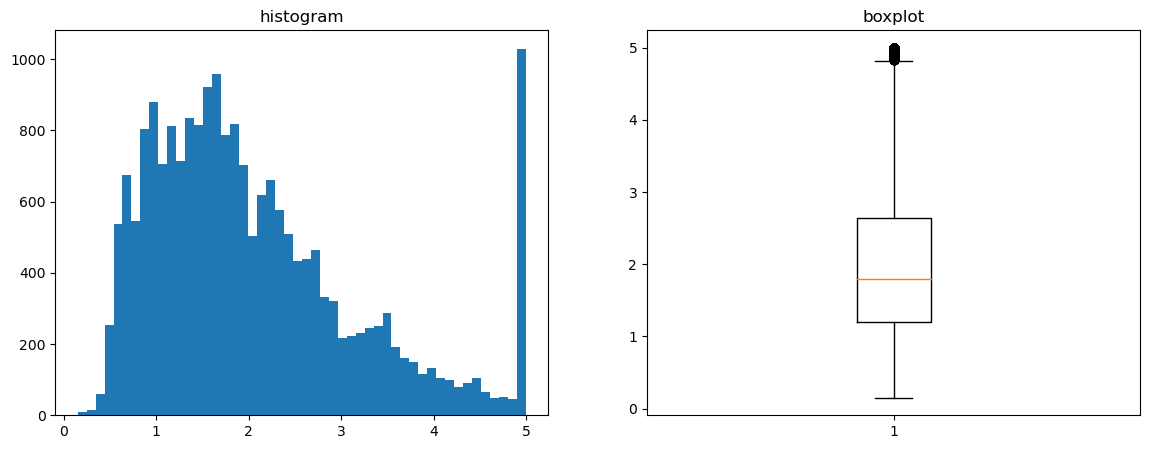

In [146]:
plt.figure(figsize=(14, 5))
# plotting histogram
plt.subplot(1, 2, 1)
plt.hist(median_house_value, bins=50)
plt.title("histogram")
# plotting boxplot
plt.subplot(1, 2, 2)
plt.boxplot(median_house_value)
plt.title("boxplot")
plt.show()
# plt.savefig("../visualizations/median_house_value.jpg")

<br>

### California housing heatmap

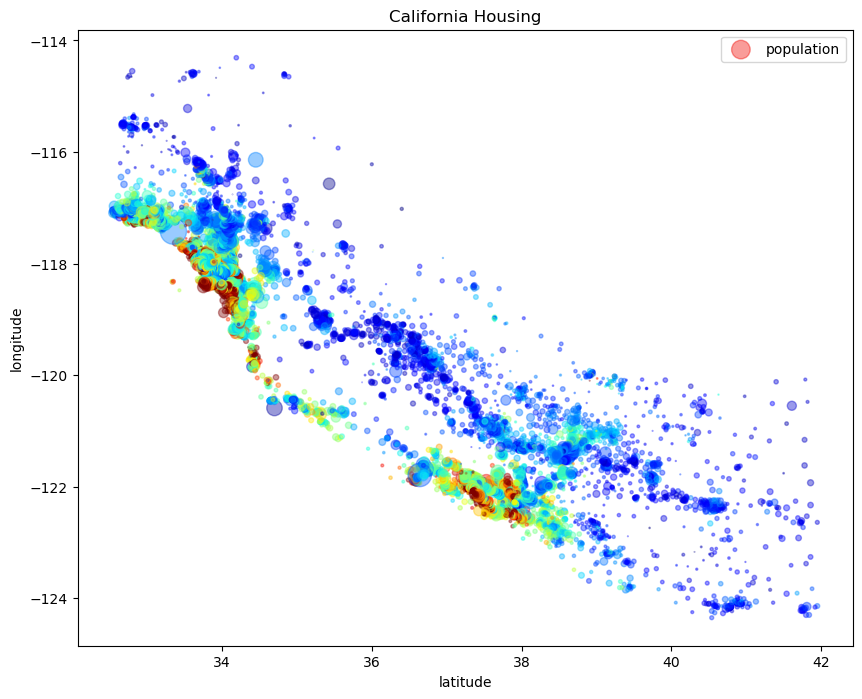

In [144]:
plt.figure(figsize=(10, 8))
plt.scatter(latitude, longitude, alpha=0.4, s=population/100, label="population", c=raw_data.MedHouseVal, cmap=plt.get_cmap("jet"))
plt.xlabel("latitude")
plt.ylabel("longitude")
plt.title("California Housing")
plt.legend()
plt.show()
# plt.savefig("../visualizations/geographic_heatmap.jpg")

<br>

In [147]:
# correlation between features
raw_data.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


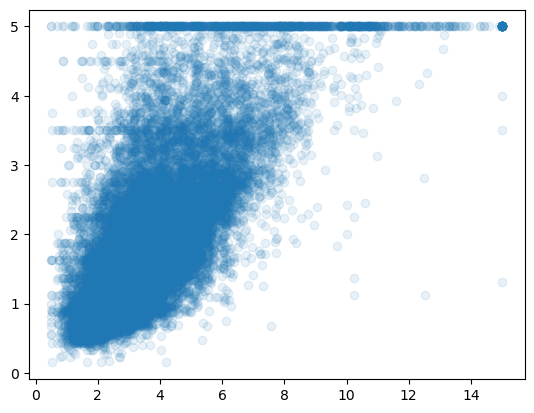

In [149]:
# strong positive correlation
plt.scatter(median_income, median_house_value, alpha=0.1)
plt.show()

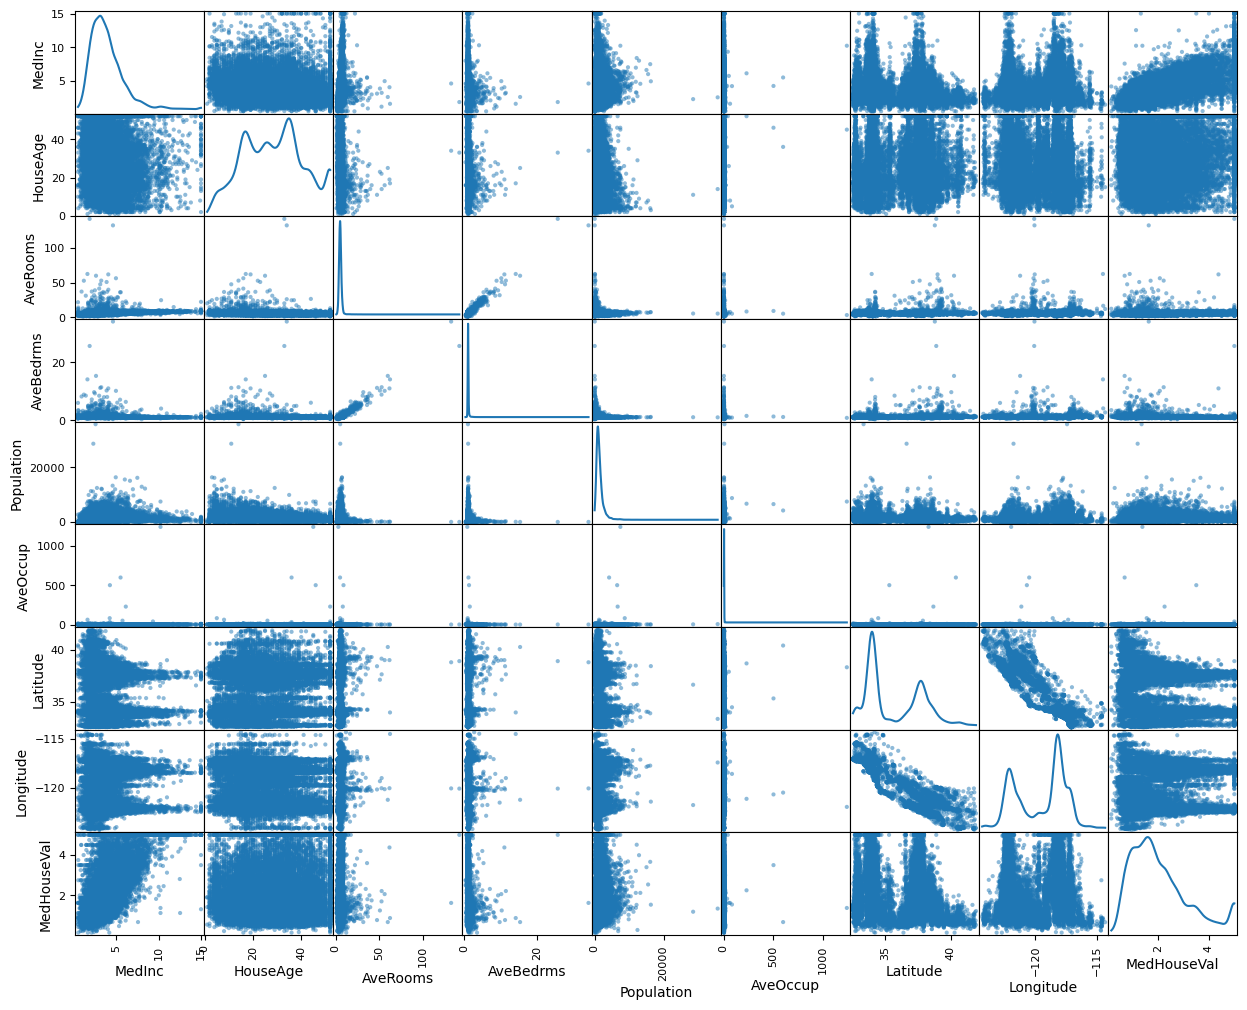

In [153]:
# scatter matrix
pd.plotting.scatter_matrix(frame=raw_data, diagonal='kde', figsize=(15, 12))
plt.show()
# plt.savefig("../visualizations/scatter_matrix.jpg")